In [95]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [245]:
# load dataset
df=pd.read_csv('Car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [246]:
# Extrect brand name from name feature 
df['brand']=df['name'].apply(lambda x:x.split()[0])

<Axes: xlabel='brand', ylabel='count'>

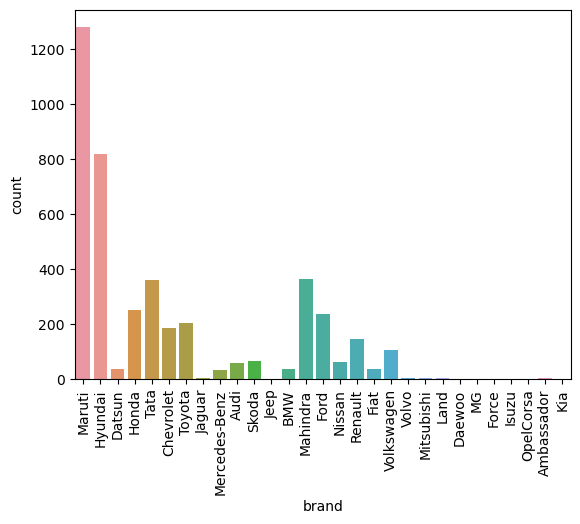

In [247]:
plt.xticks(rotation=90)
sns.countplot(x=df['brand'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12456\3680134251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['km_driven'])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='km_driven', ylabel='Density'>

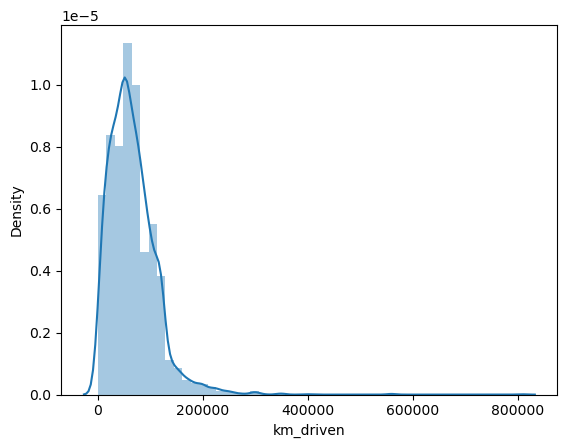

In [248]:
sns.distplot(df['km_driven'])

In [249]:
# use function transformer to remove skewness of data
# heare km_driven feature is right skewed so using function transformation we convert in normal distribution
fun=FunctionTransformer(func=np.cbrt)

In [250]:
# apply function transformer to km_driven feature
df['km']=fun.fit_transform(df['km_driven'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12456\100719777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['km'])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='km', ylabel='Density'>

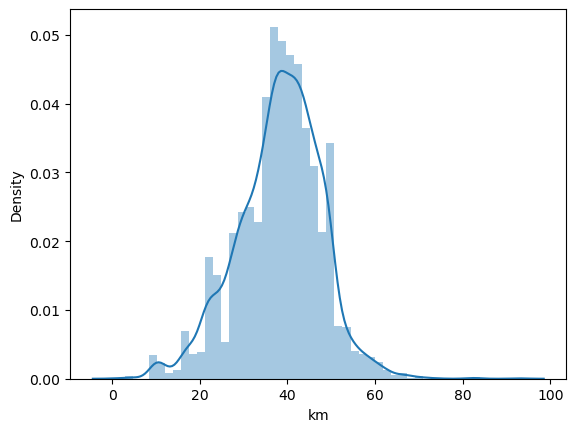

In [232]:
sns.distplot(df['km'])

<Axes: >

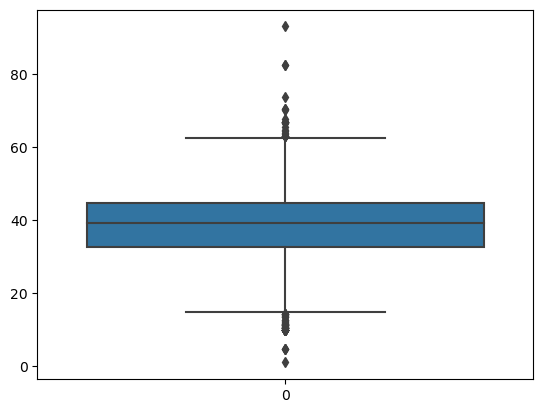

In [233]:
# using box plot we detect outlier 
sns.boxplot(df['km'])

In [234]:
# describe statistical value of feature km
df['km'].describe()

count    4340.000000
mean       38.228145
std         9.598635
min         1.000000
25%        32.710663
50%        39.148676
75%        44.814047
max        93.086327
Name: km, dtype: float64

In [235]:
# we capping techinque use where greter then upperlimit value is replace with upperlimit and 
# less then lowerlimit is replace with lowerlimit 
q1=32.710663
q2=44.814047
upperlimit=q2+1.5*(q2-q1)
lowerlimit=q1-1.5*(q2-q1)
df['km']=np.where(df['km']>upperlimit,upperlimit,
        np.where(df['km']<lowerlimit,lowerlimit,
        df['km']))

<Axes: >

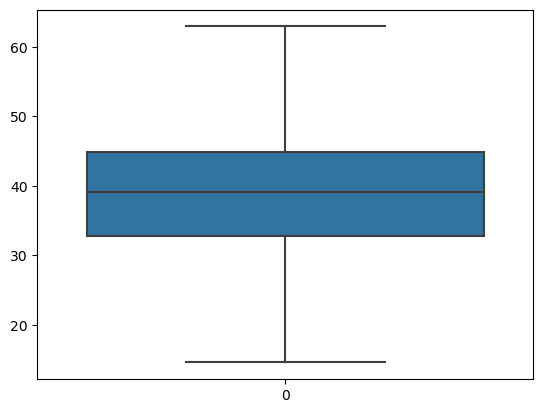

In [236]:
sns.boxplot(df['km'])

In [237]:
# Perform OneHotEncoding for convert categorical data into numerical data
encoder=OneHotEncoder(sparse_output=False, drop='first')  # drop='first' for avoiding multicolinearity 
# sparse_output_False='false' dont't create sparse  matrix
encoded_data = encoder.fit_transform(df[['fuel','brand','owner','transmission']])
# Convert to DataFrame with appropriate column names
encoded_columns = encoder.get_feature_names_out(['fuel', 'brand', 'owner', 'transmission'])
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)
# Combine the original DataFrame (optional if needed)
df=pd.concat([df, encoded_df], axis=1)

In [238]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,km,...,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,transmission_Manual
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,41.212853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,36.840315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,46.415888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,35.830479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,52.048279,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [239]:
df.drop(columns=['name','km_driven','seller_type','fuel','transmission','owner','brand'],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_12456\3340014473.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['selling_price'])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='selling_price', ylabel='Density'>

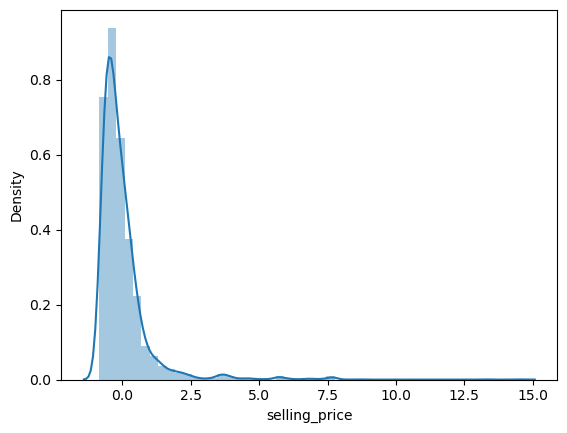

In [240]:
#perform standaritation for  
stand=StandardScaler()
df['selling_price']=stand.fit_transform(df[['selling_price']])
sns.distplot(df['selling_price'])

In [241]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['selling_price']),df['selling_price'],test_size=0.2)

In [242]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(r2_score(y_pred,y_test))
print("mae",mean_absolute_error(y_pred,y_test))
print("mse",mean_squared_error(y_pred,y_test))

0.5974876978353396
mae 0.3152338824103413
mse 0.26551196247056336


In [243]:
db=DecisionTreeRegressor(max_depth=6)
db.fit(X_train,y_train)
y_pred=db.predict(X_test)
print("mae",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mae 0.2881483609328279
mse 0.2968326239100998
r2 0.69339397710933


In [244]:
rf_model = RandomForestRegressor(n_estimators=110,random_state=42)
rf_model.fit(X_train, y_train)
# Make predictions
y_pred = rf_model.predict(X_test)
print("mae",mean_absolute_error(y_test,y_pred))
print("mse",mean_squared_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mae 0.2048317003794869
mse 0.1790427189314667
r2 0.8150621880574185
